In [1]:
# Bryan Ochoa July 27 2023 bochoa@lbl.gov

# characterization of piezoelectric displacement using
# data gathered using smaract picoscale interferometer gui, pasting results to a .txt file
# function generator producing a 60Hz Sin function, +10V peak to peak

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import signal

In [46]:
with open('C:\\Users\\opticslab\\Documents\\Realm Project\\Realms Bochoa\\Piezoelectric Characterization\\Data\\1Hz_10V_Sin.txt', 'r') as file:
    lines = file.readlines()
x = []
y = []

for line in lines:
    values = line.strip().split()
    x.append(float(values[0]))
    y.append(float(values[1]))

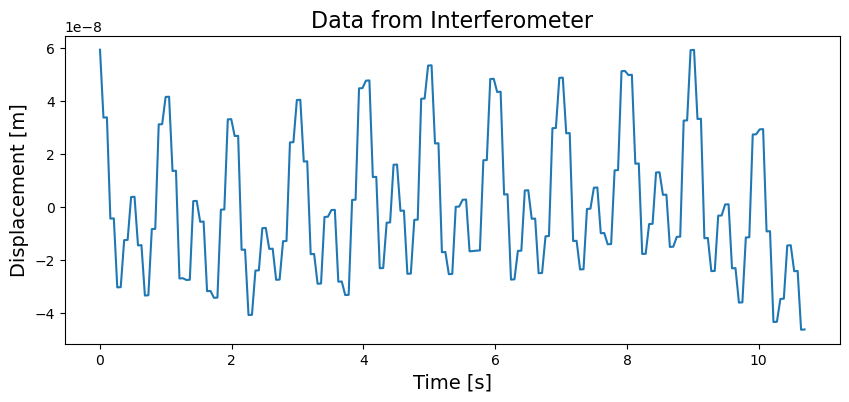

In [47]:
plt.figure(figsize=(10,4))
plt.plot(x,signal.detrend(y))
plt.title("Data from Interferometer", fontsize=16)
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('Displacement [m]', fontsize=14)
plt.show()

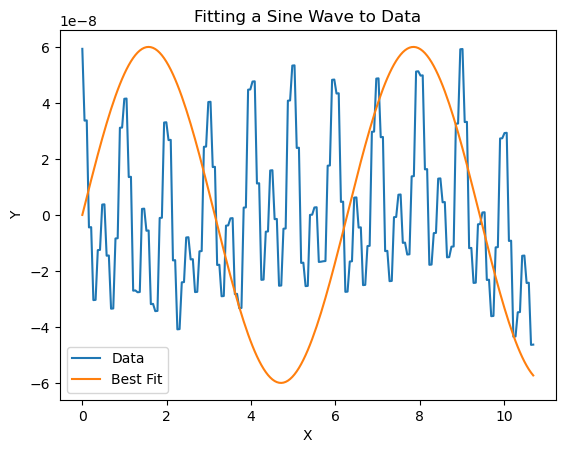

Fitted Amplitude: 6e-08
Fitted Frequency: 1.0
Fitted Phase: 0.0
Fitted Offset: 0.0


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


xnp = np.array(x[:500])
ynp = np.array(signal.detrend(y[:500]))

# Define the sine wave function to fit
def sine_wave(params, x):
    A, f, phi, offset = params
    return A * np.sin(f * x + phi) + offset

# Define the objective function (mean squared error)
def objective(params):
    y_model = sine_wave(params, xnp)
    return np.mean((ynp - y_model)**2)

# Initial guess for parameters (amplitude, frequency, phase, offset)
p0 = [.00000006, 1.0, 0.0, 0.0000]

# Use minimize to perform the fitting
result = minimize(objective, p0)#, method='CG')

# Extract the fitted parameters from the optimization result
fit_params = result.x
fit_amplitude, fit_frequency, fit_phase, fit_offset = fit_params

# Generate the best-fitting sine wave based on the found parameters
y_fit = sine_wave(fit_params, xnp)

# Plot the original data and the best-fitting sine wave
plt.plot(xnp, ynp, label='Data')
plt.plot(xnp, y_fit, label='Best Fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a Sine Wave to Data')
plt.show()

print("Fitted Amplitude:", fit_amplitude)
print("Fitted Frequency:", fit_frequency)
print("Fitted Phase:", fit_phase)
print("Fitted Offset:", fit_offset)

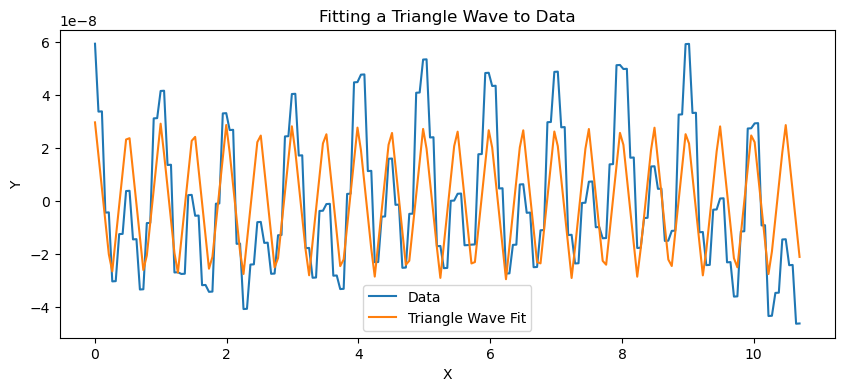

Fitted Amplitude: -5.923650885056473e-08
Fitted Frequency: 2.0035406242774036
Fitted Phase: 5.0


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


xnp = np.array(x)
ynp = np.array(signal.detrend(y))


# Define the triangle wave function
def triangle_wve(x, A, f, phi):
    return A * np.abs(2 * (x * f + phi - np.floor(x * f + phi + 0.5))) - A/2


# Define the error function (mean squared error)
def error(params):
    A, f, phi = params
    return np.mean((ynp - triangle_wve(xnp, A, f, phi))**2)

# Initial guess for the parameters (amplitude, frequency, phase)
initial_guess = [.00000008, 1.0, 0.0]

# Perform optimization to find the best-fitting parameters
result = minimize(error, initial_guess, method='powell')

# Extract the best-fitting parameters from the optimization result
A_fit, f_fit, phi_fit = result.x

# Generate the best-fitting triangle wave based on the found parameters
y_fit = triangle_wve(xnp, A_fit, f_fit, phi_fit)

# Plot the original data and the best-fitting triangle wave
plt.figure(figsize=(10,4))
plt.plot(xnp, ynp, label='Data')
plt.plot(xnp, y_fit, label='Triangle Wave Fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a Triangle Wave to Data')
plt.show()


print("Fitted Amplitude:", A_fit)
print("Fitted Frequency:", f_fit)
print("Fitted Phase:", phi_fit)


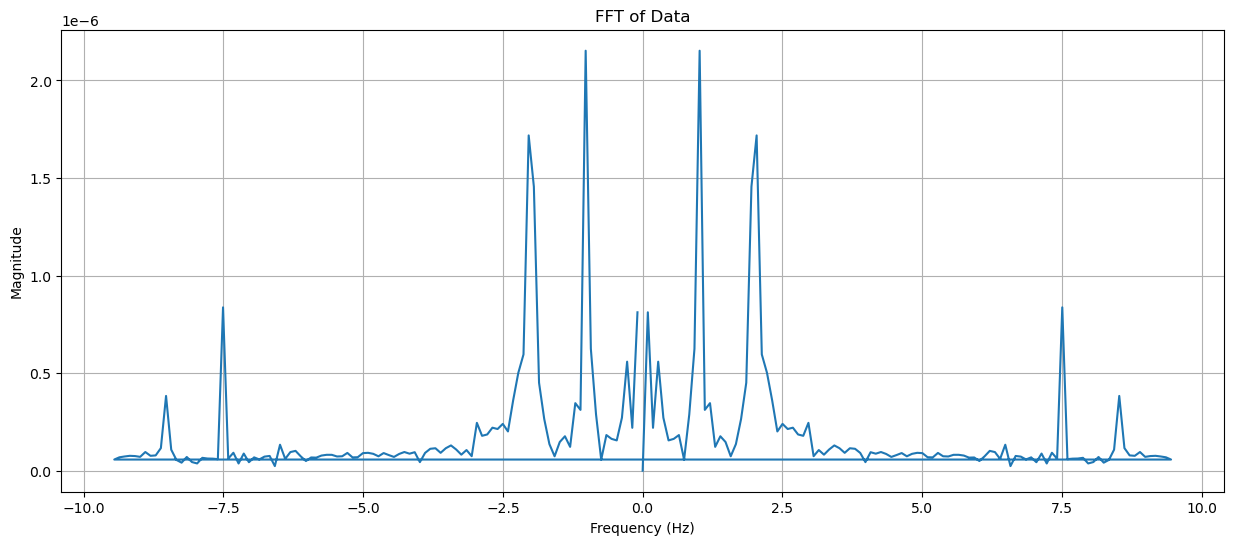

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


xnp = np.array(x)
ynp = np.array(signal.detrend(y))
fft_result = np.fft.fft(ynp)
fs = 19
frequencies = np.fft.fftfreq(len(fft_result), 1/fs)  # Frequency values

# Plot the FFT magnitude
plt.figure(figsize=(15,6))
plt.plot(frequencies, abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Data')
plt.grid(True)
plt.show()

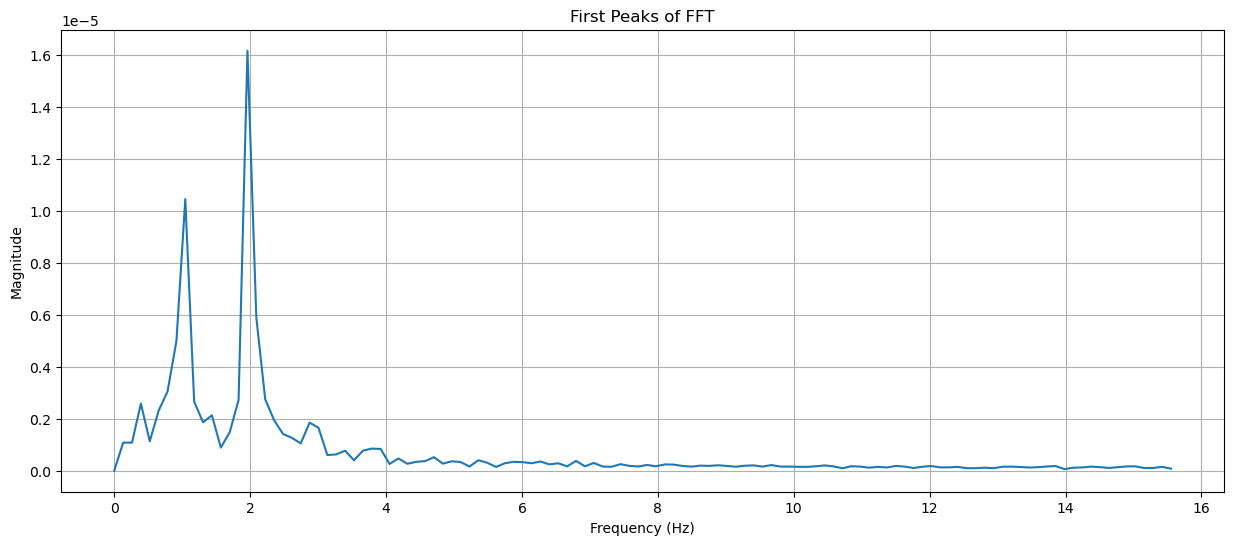

In [44]:
plt.figure(figsize=(15,6))
#plt.plot(frequencies, abs(fft_result))
plt.plot(frequencies[:120], abs(fft_result[:120]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('First Peaks of FFT')
plt.grid(True)
plt.show()


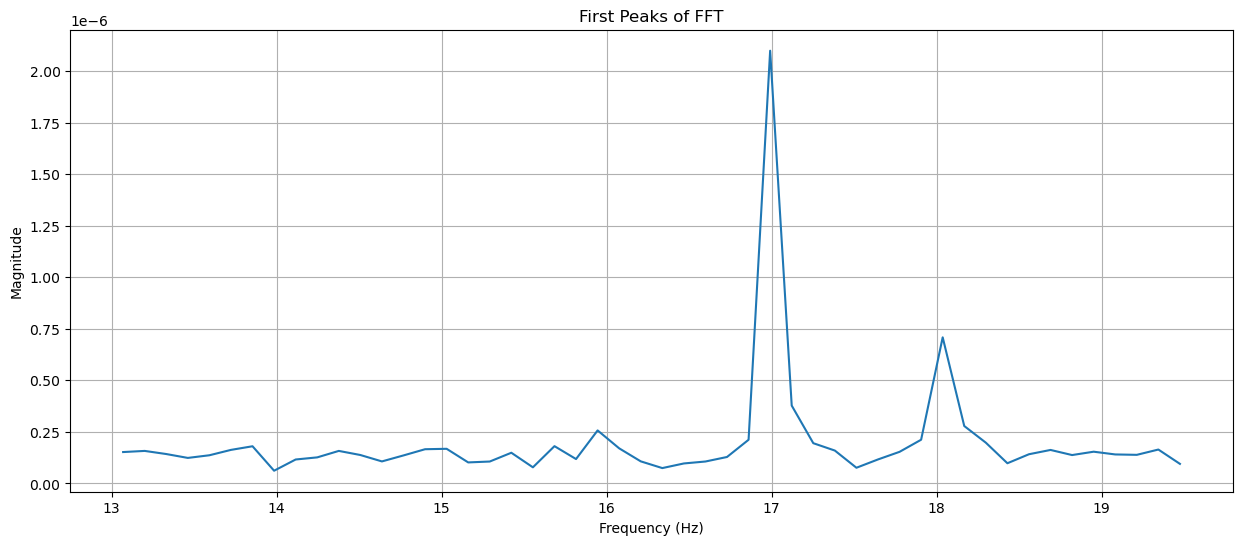

In [45]:
plt.figure(figsize=(15,6))
#plt.plot(frequencies, abs(fft_result))
plt.plot(frequencies[100:150], abs(fft_result[100:150]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('First Peaks of FFT')
plt.grid(True)
plt.show()

In [35]:
peak1 = (abs(np.max(fft_result[100:150])))
peak2 = (abs(np.max(fft_result[150:170])))
peak3 = (abs(np.max(fft_result[250:280])))
peak4 = (abs(np.max(fft_result[300:320])))

peak5 = (abs(np.max(fft_result[400:450])))
peak6 = (abs(np.max(fft_result[450:480])))
peak7 = (abs(np.max(fft_result[550:580])))

avg = (peak1 + peak2 + peak3 + peak4 + peak5 + peak6 + peak7) / 7.0

print(avg)


9.974333514820665e-07
